In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 14.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import spacy
from spellchecker import SpellChecker

In [ ]:
# Define a list of books with their titles, authors, and genres
books = [
    {"title": "Dune", "author": "Frank Herbert", "genres": ["Science Fiction"]},
    {"title": "1984", "author": "George Orwell", "genres": ["Dystopian", "Science Fiction"]},
    {"title": "Pride and Prejudice", "author": "Jane Austen", "genres": ["Romance", "Classic"]},
    {"title": "To Kill a Mockingbird", "author": "Harper Lee", "genres": ["Classic"]},
    {"title": "The Great Gatsby", "author": "F. Scott Fitzgerald", "genres": ["Classic"]},
    {"title": "Moby Dick", "author": "Herman Melville", "genres": ["Adventure", "Classic"]},
    {"title": "The Catcher in the Rye", "author": "J.D. Salinger", "genres": ["Classic"]},
    {"title": "Brave New World", "author": "Aldous Huxley", "genres": ["Dystopian", "Science Fiction"]},
    {"title": "Harry Potter and the Sorcerer's Stone", "author": "J.K. Rowling", "genres": ["Fantasy"]},
    {"title": "The Hobbit", "author": "J.R.R. Tolkien", "genres": ["Fantasy"]},
    {"title": "Fahrenheit 451", "author": "Ray Bradbury", "genres": ["Dystopian", "Science Fiction"]},
    {"title": "Jane Eyre", "author": "Charlotte Brontë", "genres": ["Romance", "Classic"]},
    {"title": "The Chronicles of Narnia", "author": "C.S. Lewis", "genres": ["Fantasy"]},
    {"title": "Animal Farm", "author": "George Orwell", "genres": ["Dystopian", "Political Satire"]},
    {"title": "The Lord of the Rings", "author": "J.R.R. Tolkien", "genres": ["Fantasy"]},
    {"title": "Gone with the Wind", "author": "Margaret Mitchell", "genres": ["Historical", "Romance"]},
    {"title": "War and Peace", "author": "Leo Tolstoy", "genres": ["Historical", "Classic"]},
    {"title": "The Alchemist", "author": "Paulo Coelho", "genres": ["Fantasy", "Adventure"]},
    {"title": "Crime and Punishment", "author": "Fyodor Dostoevsky", "genres": ["Classic", "Psychological"]},
    {"title": "The Da Vinci Code", "author": "Dan Brown", "genres": ["Thriller", "Mystery"]},
    {"title": "The Picture of Dorian Gray", "author": "Oscar Wilde", "genres": ["Classic", "Gothic"]},
    {"title": "The Handmaid's Tale", "author": "Margaret Atwood", "genres": ["Dystopian", "Science Fiction"]},
    {"title": "The Kite Runner", "author": "Khaled Hosseini", "genres": ["Historical", "Drama"]},
    {"title": "The Hunger Games", "author": "Suzanne Collins", "genres": ["Dystopian", "Science Fiction"]},
    {"title": "A Game of Thrones", "author": "George R.R. Martin", "genres": ["Fantasy"]},
    {"title": "The Shining", "author": "Stephen King", "genres": ["Horror", "Thriller"]},
    {"title": "The Fault in Our Stars", "author": "John Green", "genres": ["Romance", "Drama"]},
    {"title": "Life of Pi", "author": "Yann Martel", "genres": ["Adventure", "Fantasy"]},
    {"title": "Catch-22", "author": "Joseph Heller", "genres": ["Classic", "Satire"]},
    {"title": "The Road", "author": "Cormac McCarthy", "genres": ["Dystopian", "Adventure"]},
    {"title": "Slaughterhouse-Five", "author": "Kurt Vonnegut", "genres": ["Science Fiction", "Satire"]},
    {"title": "The Book Thief", "author": "Markus Zusak", "genres": ["Historical", "Drama"]},
    {"title": "The Giver", "author": "Lois Lowry", "genres": ["Dystopian", "Science Fiction"]},
    {"title": "Wuthering Heights", "author": "Emily Brontë", "genres": ["Classic", "Gothic"]},
    {"title": "Dracula", "author": "Bram Stoker", "genres": ["Classic", "Horror"]},
    {"title": "Frankenstein", "author": "Mary Shelley", "genres": ["Classic", "Horror"]},
    {"title": "The Metamorphosis", "author": "Franz Kafka", "genres": ["Classic", "Psychological"]},
    {"title": "The Little Prince", "author": "Antoine de Saint-Exupéry", "genres": ["Fantasy", "Classic"]},
    {"title": "Anna Karenina", "author": "Leo Tolstoy", "genres": ["Classic", "Romance"]},
    {"title": "The Girl on the Train", "author": "Paula Hawkins", "genres": ["Thriller", "Mystery"]},
    {"title": "A Tale of Two Cities", "author": "Charles Dickens", "genres": ["Classic", "Historical"]},
    {"title": "Sense and Sensibility", "author": "Jane Austen", "genres": ["Classic", "Romance"]},
    {"title": "The Brothers Karamazov", "author": "Fyodor Dostoevsky", "genres": ["Classic", "Psychological"]},
    {"title": "One Hundred Years of Solitude", "author": "Gabriel Garcia Marquez", "genres": ["Magical Realism", "Classic"]},
    {"title": "The Count of Monte Cristo", "author": "Alexandre Dumas", "genres": ["Classic", "Adventure"]},
    {"title": "Les Misérables", "author": "Victor Hugo", "genres": ["Classic", "Historical"]},
    {"title": "Don Quixote", "author": "Miguel de Cervantes", "genres": ["Classic", "Adventure"]},
    {"title": "The Divine Comedy", "author": "Dante Alighieri", "genres": ["Classic", "Poetry"]},
    {"title": "Ulysses", "author": "James Joyce", "genres": ["Classic", "Modernist"]},
    {"title": "Beloved", "author": "Toni Morrison", "genres": ["Historical", "Drama"]},
    {"title": "The Sound and the Fury", "author": "William Faulkner", "genres": ["Classic", "Modernist"]},
    {"title": "A Clockwork Orange", "author": "Anthony Burgess", "genres": ["Dystopian", "Science Fiction"]},
    {"title": "The Sun Also Rises", "author": "Ernest Hemingway", "genres": ["Classic", "Drama"]},
    {"title": "Invisible Man", "author": "Ralph Ellison", "genres": ["Classic", "Drama"]},
    {"title": "Heart of Darkness", "author": "Joseph Conrad", "genres": ["Classic", "Adventure"]},
    {"title": "The Call of the Wild", "author": "Jack London", "genres": ["Adventure", "Classic"]},
    {"title": "Middlemarch", "author": "George Eliot", "genres": ["Classic", "Drama"]},
    {"title": "Great Expectations", "author": "Charles Dickens", "genres": ["Classic", "Drama"]},
    {"title": "Lolita", "author": "Vladimir Nabokov", "genres": ["Classic", "Psychological"]},
    {"title": "The Grapes of Wrath", "author": "John Steinbeck", "genres": ["Historical", "Drama"]},
    {"title": "Madame Bovary", "author": "Gustave Flaubert", "genres": ["Classic", "Romance"]},
    {"title": "The Old Man and the Sea", "author": "Ernest Hemingway", "genres": ["Classic", "Adventure"]},
    {"title": "Rebecca", "author": "Daphne du Maurier", "genres": ["Gothic", "Mystery"]},
    {"title": "East of Eden", "author": "John Steinbeck", "genres": ["Classic", "Drama"]},
    {"title": "A Passage to India", "author": "E.M. Forster", "genres": ["Classic", "Historical"]},
    {"title": "The Bell Jar", "author": "Sylvia Plath", "genres": ["Classic", "Psychological"]},
    {"title": "Mrs. Dalloway", "author": "Virginia Woolf", "genres": ["Classic", "Modernist"]},
    {"title": "Of Mice and Men", "author": "John Steinbeck", "genres": ["Classic", "Drama"]},
    {"title": "The Age of Innocence", "author": "Edith Wharton", "genres": ["Classic", "Romance"]},
    {"title": "One Flew Over the Cuckoo's Nest", "author": "Ken Kesey", "genres": ["Classic", "Psychological"]},
    {"title": "The Scarlet Letter", "author": "Nathaniel Hawthorne", "genres": ["Classic", "Historical"]},
    {"title": "On the Road", "author": "Jack Kerouac", "genres": ["Classic", "Adventure"]},
    {"title": "Tess of the d'Urbervilles", "author": "Thomas Hardy", "genres": ["Classic", "Romance"]},
    {"title": "The Hunchback of Notre-Dame", "author": "Victor Hugo", "genres": ["Classic", "Gothic"]},
    {"title": "The Stranger", "author": "Albert Camus", "genres": ["Classic", "Philosophical"]},
    {"title": "The Trial", "author": "Franz Kafka", "genres": ["Classic", "Psychological"]},
    {"title": "Alice's Adventures in Wonderland", "author": "Lewis Carroll", "genres": ["Fantasy", "Classic"]},
    {"title": "To the Lighthouse", "author": "Virginia Woolf", "genres": ["Classic", "Modernist"]},
    {"title": "The War of the Worlds", "author": "H.G. Wells", "genres": ["Science Fiction", "Classic"]},
    {"title": "The Hitchhiker's Guide to the Galaxy", "author": "Douglas Adams", "genres": ["Science Fiction", "Humor"]}
]

In [ ]:
print("Noumber of books: ", len(books))

Noumber of books:  80


In [ ]:
class BookRecommendationEnv:
    def __init__(self, books):
        self.books = books
        self.genres = list(set(genre for book in books for genre in book['genres']))
        self.state = None
        self.last_action = None
        self.current_genre = None

    def reset(self, genre=None):
        self.state = genre if genre else random.choice(self.genres)
        self.last_action = None
        self.current_genre = self.state
        return self.state

    def step(self, action):
        reward = 5 if self.current_genre in self.books[action]['genres'] else -1
        self.last_action = action
        done = True
        return self.state, reward, done, {}

    def get_state_space_size(self):
        return len(self.genres)

    def get_action_space_size(self):
        return len(self.books)

In [ ]:
class DQN(nn.Module):
    def __init__(self, state_space, action_space):
        super(DQN, self).__init__()
        self.action_space = action_space
        self.fc1 = nn.Linear(state_space, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_space)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=1)
        return x

In [ ]:
class PrioritizedReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)
        self.priorities = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
        priority = 1 if reward == 5 else 0
        self.priorities.append(priority)

    def sample(self, batch_size):
        priorities = np.array(self.priorities)
        if priorities.sum() == 0:
            probabilities = np.ones(len(self.buffer)) / len(self.buffer)
        else:
            probabilities = priorities / priorities.sum()
        indices = np.random.choice(len(self.buffer), batch_size, p=probabilities)
        samples = [self.buffer[idx] for idx in indices]

        states, actions, rewards, next_states, dones = zip(*samples)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def __len__(self):
        return len(self.buffer)

In [ ]:
class DQNTrainer:
    def __init__(self, env, policy_net, target_net, optimizer, criterion, gamma, epsilon, epsilon_min, epsilon_decay):
        self.env = env
        self.policy_net = policy_net
        self.target_net = target_net
        self.optimizer = optimizer
        self.criterion = criterion
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.batch_size = 64
        self.replay_buffer = PrioritizedReplayBuffer(10000)
        self.action_space = env.get_action_space_size()
        self.state_space = env.get_state_space_size()

    def select_action(self, state, exclude_actions):
        if random.random() < self.epsilon:
            available_actions = [a for a in range(self.env.get_action_space_size()) if a not in exclude_actions]
            return random.choice(available_actions)
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q_values = self.policy_net(state)
            for action in exclude_actions:
                q_values[0][action] = float('-inf')
            return q_values.argmax().item()

    def train_with_user_simulation(self, user_simulator, num_episodes=1500):
        total_rewards = []
        epsilons = []
        losses = []

        for episode in range(num_episodes):
            total_reward = 0
            exclude_actions = []
            episode_losses = []

            requested_genre = user_simulator.request_genre()
            state = np.eye(self.env.get_state_space_size())[self.env.genres.index(requested_genre)]

            for rec in range(80):
                action = self.select_action(state, exclude_actions)
                book = self.env.books[action]

                feedback = user_simulator.provide_feedback(book)
                if feedback == 'done':
                    done = True
                else:
                    done = False

                reward_bool = user_simulator.get_reward(book)
                if reward_bool:
                    reward = 5
                else:
                    reward = -1

                exclude_actions.append(action)

                next_state = np.eye(self.state_space)[self.env.genres.index(requested_genre)]
                self.replay_buffer.push(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward

                loop_reward = 0
                loop_exclude_actions = [action for action in exclude_actions]

                while True:
                    if reward >= 25 or len(loop_exclude_actions)==80:
                        break

                    action = self.select_action(state, loop_exclude_actions)
                    book = env.books[action]

                    reward_bool = user_simulator.get_reward(book)
                    if reward_bool:
                        reward = 5
                    else:
                        reward = -1

                    loop_exclude_actions.append(action)

                    next_state = np.eye(state_space)[env.genres.index(requested_genre)]
                    self.replay_buffer.push(state, action, reward, next_state, done)
                    loop_reward += reward


                if len(self.replay_buffer) > self.batch_size:
                    loss = self._optimize_model()
                    episode_losses.append(loss)

                if feedback == 'done' or len(exclude_actions) == 80:
                    break
                elif feedback == 'switch_genre':
                    requested_genre = user_simulator.request_genre()
                    state = np.eye(self.env.get_state_space_size())[self.env.genres.index(requested_genre)]
                    exclude_actions = []
                elif feedback == 'continue_same_genre':
                    state = np.eye(self.env.get_state_space_size())[self.env.genres.index(requested_genre)]

            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

            if episode % 10 == 0:
                self.target_net.load_state_dict(self.policy_net.state_dict())
                print(f"Episode {episode}, Total reward: {total_reward}, Epsilon: {self.epsilon}")

            total_rewards.append(total_reward)
            epsilons.append(self.epsilon)
            if episode_losses:
                losses.append(np.mean(episode_losses))

        torch.save(self.policy_net.state_dict(), 'policy_net.pth')
        torch.save(self.target_net.state_dict(), 'target_net.pth')
        return total_rewards, epsilons, losses

    def _optimize_model(self):
        states_b, actions_b, rewards_b, next_states_b, dones_b = self.replay_buffer.sample(self.batch_size)
        states_b = torch.tensor(states_b, dtype=torch.float32)
        next_states_b = torch.tensor(next_states_b, dtype=torch.float32)
        rewards_b = torch.tensor(rewards_b, dtype=torch.float32)
        actions_b = torch.tensor(actions_b, dtype=torch.long)
        dones_b = torch.tensor(dones_b, dtype=torch.float32)

        q_values = self.policy_net(states_b)
        next_q_values = self.target_net(next_states_b)
        q_value = q_values.gather(1, actions_b.unsqueeze(1)).squeeze(1)
        next_q_value = next_q_values.max(1)[0]
        expected_q_value = rewards_b + self.gamma * next_q_value * (1 - dones_b)
        loss = self.criterion(q_value, expected_q_value.detach())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()


    def save_model(self):
        torch.save(self.policy_net.state_dict(), 'book_recommendation_model.pth')
        print("Model saved to book_recommendation_model")

    def load_model(self):
        self.policy_net.load_state_dict(torch.load('book_recommendation_model.pth'))
        self.policy_net.eval()
        print("Model loaded from book_recommendation_model")

    def plot_training_metrics(self, total_rewards, epsilons, losses):
        episodes = range(len(total_rewards))
        fig, ax1 = plt.subplots(figsize=(12, 6))

        ax1.set_xlabel('Episode')
        ax1.set_ylabel('Total Reward', color='tab:blue')
        ax1.plot(episodes, total_rewards, label='Total Rewards', color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        ax2 = ax1.twinx()
        ax2.set_ylabel('Epsilon', color='tab:green')
        ax2.plot(episodes, epsilons, label='Epsilon', color='tab:green')
        ax2.tick_params(axis='y', labelcolor='tab:green')

        ax3 = ax1.twinx()
        ax3.spines['right'].set_position(('outward', 60))
        ax3.set_ylabel('Loss', color='tab:red')
        ax3.plot(episodes, losses, label='Loss', color='tab:red')
        ax3.tick_params(axis='y', labelcolor='tab:red')

        fig.tight_layout()
        fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
        plt.title('Training Metrics')
        plt.show()

In [ ]:
class UserSimulator:
    def __init__(self, genres, error_rate=0.1, min_recommendations=20):
        self.error_rate = error_rate
        self.min_recommendations = min_recommendations
        self.genres = genres
        self.requested_genre = None
        self.recommendation_count = 0

    def reset(self, genre):
        self.requested_genre = genre
        self.recommendation_count = 0

    def request_genre(self):
        self.requested_genre = random.choice(self.genres)
        return self.requested_genre

    def get_reward(self, book):
        correct_genre = self.requested_genre in book['genres']
        if random.random() < self.error_rate:
            return not correct_genre
        return correct_genre

    def provide_feedback(self, book):
        self.recommendation_count += 1
        correct_genre = self.requested_genre in book['genres']
        if random.random() < self.error_rate:
            correct_genre = not correct_genre
        if self.recommendation_count >= self.min_recommendations:
            if not correct_genre and random.random() < 0.01:
                return 'done'
            elif correct_genre and random.random() < 0.005:
                return 'done'
        if correct_genre:
            if random.random() < 0.5:
                new_genre = random.choice([g for g in self.genres if g != self.requested_genre])
                self.reset(new_genre)
                return 'switch_genre'
            else:
                return 'continue_same_genre'
        else:
            return 'continue_same_genre'

In [ ]:
class RecommendationSystem:
    def __init__(self, env, policy_net):
        self.env = env
        self.policy_net = policy_net
        self.state_space = env.get_state_space_size()
        self.action_space = env.get_action_space_size()
        self.genres = env.genres
        self.nlp = spacy.load("en_core_web_sm")
        self.spell = SpellChecker()

    def correct_spelling(self, text):
        corrected_text = []
        for word in text.split():
            if word.lower() in self.genres:
                corrected_text.append(word)
            else:
                corrected_text.append(self.spell.correction(word))
        return ' '.join(corrected_text)

    def extract_genre(self, text):
        for genre in self.genres:
            if genre.lower() in text.lower():
                return genre
            corrected_sentence = self.correct_spelling(text)
        for genre in self.genres:
            if genre.lower() in corrected_sentence.lower():
                return genre
        return " "

    def recommend_books(self):
        print("Welcome to the Book Recommendation Chatbot!")
        print("Here are the available genres:")
        print(*self.genres, sep='\n')
        while True:
            print("Bot: Please enter a genre you like from the above options.")
            user_input = input("You: ").strip()
            requested_genre = self.extract_genre(user_input)

            if requested_genre not in env.genres:
                print("Bot: Sorry I didn't understand. Please try again.")
                continue

            state = np.eye(state_space)[env.genres.index(requested_genre)]
            exclude_actions = []
            while True:
                action = self.select_action(state, exclude_actions)
                book = env.books[action]

                print(f"Bot: Recommended book: {book['title']} by {book['author']}")
                print("     Do you accept this recommendation? (yes/no): ")
                user_feedback = input("You: ").strip().lower()
                if user_feedback == 'yes':
                    print("Bot: Recommendation accepted.")
                    break
                elif user_feedback == 'no':
                    print("Bot: Recommendation rejected.")
                    exclude_actions.append(action)
                else:
                    print("Bot: Sorry I didn't understand. Please try again.")

            print("     Do you want another recommendation? (yes/done): ")
            continue_interaction = input("You: ").strip().lower()
            if continue_interaction == 'done':
                print("Exiting...Thank you")
                break
            elif continue_interaction == 'yes':
                continue
            else:
                print("Bot: Sorry I didn't understand. Please try again.")
                continue

    def select_action(self, state, exclude_actions):
        state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            q_values = self.policy_net(state)
            for action in exclude_actions:
                q_values[0][action] = float('-inf')
            return q_values.argmax().item()

In [ ]:
# Initialize environment
env = BookRecommendationEnv(books)

# Initialize the policy and target networks
state_space = env.get_state_space_size()
action_space = env.get_action_space_size()
policy_net = DQN(state_space, action_space)
target_net = DQN(state_space, action_space)
target_net.load_state_dict(policy_net.state_dict())

# Define optimizer and loss function
optimizer = optim.Adam(policy_net.parameters())
criterion = nn.MSELoss()

# Initialize the DQN trainer
trainer = DQNTrainer(
    env,
    policy_net,
    target_net,
    optimizer,
    criterion,
    gamma=0.99,
    epsilon=1.0,
    epsilon_min=0.01,
    epsilon_decay=0.995
)

# Initialize the user simulator
user_simulator = UserSimulator(env.genres)

Episode 0, Total reward: -32, Epsilon: 0.995
Episode 10, Total reward: -14, Epsilon: 0.946354579813443
Episode 20, Total reward: -2, Epsilon: 0.9000874278732445
Episode 30, Total reward: 4, Epsilon: 0.8560822709551227
Episode 40, Total reward: -20, Epsilon: 0.8142285204175609
Episode 50, Total reward: -8, Epsilon: 0.7744209942832988
Episode 60, Total reward: 16, Epsilon: 0.736559652908221
Episode 70, Total reward: -2, Epsilon: 0.7005493475733617
Episode 80, Total reward: 4, Epsilon: 0.6662995813682115
Episode 90, Total reward: -14, Epsilon: 0.6337242817644086
Episode 100, Total reward: -32, Epsilon: 0.6027415843082742
Episode 110, Total reward: 22, Epsilon: 0.5732736268885887
Episode 120, Total reward: -26, Epsilon: 0.5452463540625918
Episode 130, Total reward: 22, Epsilon: 0.5185893309484582
Episode 140, Total reward: 10, Epsilon: 0.4932355662165453
Episode 150, Total reward: 46, Epsilon: 0.46912134373457726
Episode 160, Total reward: 4, Epsilon: 0.446186062443672
Episode 170, Total r

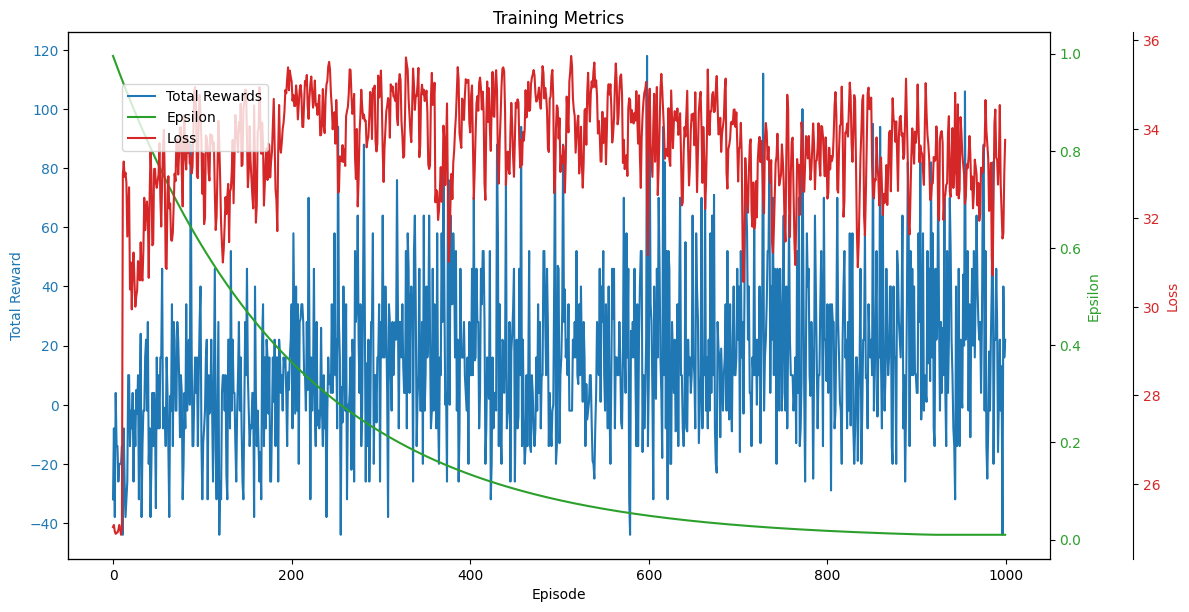

In [ ]:
# Train the DQN model
total_rewards, epsilons, losses = trainer.train_with_user_simulation(user_simulator, num_episodes=1000)

# Plot the training metrics
trainer.plot_training_metrics(total_rewards, epsilons, losses)

In [ ]:
# Initialize the recommendation system
recommendation_system = RecommendationSystem(env, policy_net)

# Get book recommendations
recommendation_system.recommend_books()

Welcome to the Book Recommendation Chatbot!
Here are the available genres:
Poetry
Modernist
Satire
Humor
Drama
Mystery
Adventure
Psychological
Gothic
Philosophical
Political Satire
Romance
Classic
Fantasy
Historical
Magical Realism
Horror
Thriller
Dystopian
Science Fiction
Bot: Please enter a genre you like from the above options.
You: Can you suggest a classic book?
Bot: Recommended book: The Old Man and the Sea by Ernest Hemingway
     Do you accept this recommendation? (yes/no): 
You: no
Bot: Recommendation rejected.
Bot: Recommended book: Heart of Darkness by Joseph Conrad
     Do you accept this recommendation? (yes/no): 
You: yes
Bot: Recommendation accepted.
     Do you want another recommendation? (yes/done): 
You: yes
Bot: Please enter a genre you like from the above options.
You: Please recommend a pyschological book.
Bot: Recommended book: Lolita by Vladimir Nabokov
     Do you accept this recommendation? (yes/no): 
You: yes
Bot: Recommendation accepted.
     Do you want ano

In [ ]:
def load_policy_net(checkpoint_path, dqn_model):
    state_dict = torch.load(checkpoint_path)
    dqn_model.load_state_dict(state_dict)
    dqn_model.eval()
    return dqn_model

checkpoint_path = '/content/book_recommendation_model.pth'
policy_net = load_policy_net(checkpoint_path, policy_net)

recommendation_system = RecommendationSystem(env, policy_net)
recommendation_system.recommend_books()

Welcome to the Book Recommendation Chatbot!
Here are the available genres:
Philosophical
Psychological
Poetry
Dystopian
Modernist
Magical Realism
Political Satire
Drama
Horror
Romance
Humor
Mystery
Gothic
Science Fiction
Historical
Fantasy
Classic
Thriller
Adventure
Satire
Bot: Please enter a genre you like from the above options.
You: can you recommend horror genre?
Bot: Recommended book: The Fault in Our Stars by John Green
     Do you accept this recommendation? (yes/no): 
You: no
Bot: Recommendation rejected.
Bot: Recommended book: The Kite Runner by Khaled Hosseini
     Do you accept this recommendation? (yes/no): 
You: yes
Bot: Recommendation accepted.
     Do you want another recommendation? (yes/done): 
You: done
Exiting...Thank you
